In [1]:
import pathlib
from pathlib import Path
import scipy.io as sio
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from tsfresh import extract_features

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = Path.cwd().parent
print(root_dir)

folder_raw_data_milling = root_dir / 'data/raw/milling'
folder_processed_data_milling = root_dir / 'data/processed/milling'


df = pd.read_csv(folder_processed_data_milling / "milling.csv.gz", compression='gzip',)
print(df.shape)

/home/tim/Documents/feat-store
(740480, 10)


In [3]:
df.head()

,cut_id,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
0,0_0,0,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512,0
1,0_0,0,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523,0
2,0_0,0,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609,0
3,0_0,0,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934,0
4,0_0,0,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859,0


In [4]:
df.drop(columns=['case', 'tool_class'], inplace=True)
df.head()

,cut_id,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac
0,0_0,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512
1,0_0,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523
2,0_0,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609
3,0_0,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934
4,0_0,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859


In [5]:
df = df[0:256]


In [6]:
df.shape

(256, 8)

In [7]:
fc_parameters = {
    "length": None,
    "kurtosis": None,
}

In [8]:
extracted_features = extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=fc_parameters)

Feature Extraction: 100%|██████████| 12/12 [00:00<00:00, 35221.59it/s]


In [9]:
extracted_features

,ae_spindle__length,ae_spindle__kurtosis,ae_table__length,ae_table__kurtosis,smcdc__length,smcdc__kurtosis,smcac__length,smcac__kurtosis,vib_spindle__length,vib_spindle__kurtosis,vib_table__length,vib_table__kurtosis
0_0,64.0,-0.348446,64.0,-0.190215,64.0,-0.256599,64.0,-1.367461,64.0,-0.126833,64.0,2.144662
0_1,64.0,0.724161,64.0,-0.236114,64.0,0.384966,64.0,-1.248971,64.0,0.504015,64.0,2.357173
0_2,64.0,-0.297622,64.0,-0.425231,64.0,0.052151,64.0,-1.297844,64.0,0.486500,64.0,2.844314
0_3,64.0,0.651310,64.0,-0.494050,64.0,0.004801,64.0,-1.197047,64.0,-0.428992,64.0,2.177012


In [10]:
df.head()

,cut_id,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac
0,0_0,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512
1,0_0,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523
2,0_0,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609
3,0_0,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934
4,0_0,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859


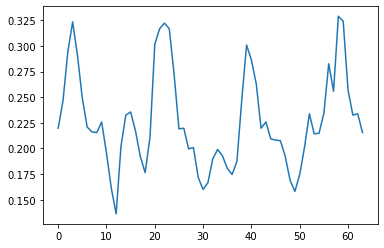

In [11]:
plt.plot(df[df['cut_id']=='0_0']['ae_spindle'])

In [15]:
# try standard default features
extracted_features = extract_features(df, column_id="cut_id", column_sort="time")

Feature Extraction: 100%|██████████| 12/12 [00:00<00:00, 29.28it/s]


In [16]:
extracted_features.head()

,smcdc__variance_larger_than_standard_deviation,smcdc__has_duplicate_max,smcdc__has_duplicate_min,smcdc__has_duplicate,smcdc__sum_values,smcdc__abs_energy,smcdc__mean_abs_change,smcdc__mean_change,smcdc__mean_second_derivative_central,smcdc__median,...,vib_table__permutation_entropy__dimension_5__tau_1,vib_table__permutation_entropy__dimension_6__tau_1,vib_table__permutation_entropy__dimension_7__tau_1,vib_table__query_similarity_count__query_None__threshold_0.0,"vib_table__matrix_profile__feature_""min""__threshold_0.98","vib_table__matrix_profile__feature_""max""__threshold_0.98","vib_table__matrix_profile__feature_""mean""__threshold_0.98","vib_table__matrix_profile__feature_""median""__threshold_0.98","vib_table__matrix_profile__feature_""25""__threshold_0.98","vib_table__matrix_profile__feature_""75""__threshold_0.98"
0_0,0.0,0.0,0.0,1.0,443.989258,3082.392910,0.125403,0.003565,0.001969,6.955566,...,3.395082,3.848332,4.036541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0_1,0.0,0.0,0.0,1.0,437.714845,2995.949091,0.130053,-0.000465,0.000866,6.843262,...,3.389419,3.763214,3.908012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0_2,0.0,0.0,0.0,1.0,450.385743,3171.970930,0.125713,0.000465,0.000984,7.023926,...,3.545490,3.842572,3.940935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0_3,0.0,0.0,0.0,1.0,437.851563,2997.256622,0.134704,-0.000465,0.000788,6.853027,...,3.545490,3.913062,4.036541,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# drop all columns in extracted_features that have NaN values
extracted_features.dropna(axis=1, how='any', inplace=True)

extracted_features.head()

,smcdc__variance_larger_than_standard_deviation,smcdc__has_duplicate_max,smcdc__has_duplicate_min,smcdc__has_duplicate,smcdc__sum_values,smcdc__abs_energy,smcdc__mean_abs_change,smcdc__mean_change,smcdc__mean_second_derivative_central,smcdc__median,...,vib_table__fourier_entropy__bins_2,vib_table__fourier_entropy__bins_3,vib_table__fourier_entropy__bins_5,vib_table__fourier_entropy__bins_10,vib_table__fourier_entropy__bins_100,vib_table__permutation_entropy__dimension_3__tau_1,vib_table__permutation_entropy__dimension_4__tau_1,vib_table__permutation_entropy__dimension_5__tau_1,vib_table__permutation_entropy__dimension_6__tau_1,vib_table__permutation_entropy__dimension_7__tau_1
0_0,0.0,0.0,0.0,1.0,443.989258,3082.392910,0.125403,0.003565,0.001969,6.955566,...,0.425328,0.556060,0.816209,1.249166,2.700099,1.678582,2.605887,3.395082,3.848332,4.036541
0_1,0.0,0.0,0.0,1.0,437.714845,2995.949091,0.130053,-0.000465,0.000866,6.843262,...,0.369333,0.437495,0.847921,1.295175,2.798755,1.750126,2.684040,3.389419,3.763214,3.908012
0_2,0.0,0.0,0.0,1.0,450.385743,3171.970930,0.125713,0.000465,0.000984,7.023926,...,0.425328,0.527300,0.874074,1.207157,2.818806,1.663622,2.701703,3.545490,3.842572,3.940935
0_3,0.0,0.0,0.0,1.0,437.851563,2997.256622,0.134704,-0.000465,0.000788,6.853027,...,0.228632,0.527300,0.585165,1.026020,2.650770,1.710143,2.813248,3.545490,3.913062,4.036541
